<h1 style="color:blue"><center>Introduction To Data Science</center></h1>

<h3 style="color:black"><center> New York Citi Bike Trips </center></h3>
<br>
<p>Data Set : https://s3.amazonaws.com/tripdata/index.html </p>

Citi Bike is a bike sharing service available in New York City, that permits easy and affordable bike trips. They regularly release data about such trips, including starting and ending stations, starting and ending time, duration of the trip and few others variables. 

Let's take a look at our data!

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import numpy as np

In [2]:
citi_data = pd.read_csv('./citi_bike_aug.csv')
citi_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1


We seem to have some null values in the data.

In [3]:
citi_data.shape

(1977177, 15)

In [4]:
column_names = {"start station id":"origin_id","start station name":"origin",
                                     "start station latitude":"origin_latitude",
                                     "start station longitude":"origin_longitude","end station id":"dest_id",
                                    "end station latitude":"dest_latitude","end station name":"destination",
                                    "end station longitude":"dest_longitude", "birth year":"birth_year"}

In [5]:
citi_data.rename(index = str, columns = column_names, inplace = True)
citi_data.tail()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender
1977172,592,2018-08-31 23:59:27.6530,2018-09-01 00:09:20.5800,2003.0,1 Ave & E 18 St,40.733812,-73.980544,518.0,E 39 St & 2 Ave,40.747804,-73.973442,33086,Subscriber,1996,1
1977173,451,2018-08-31 23:59:42.8400,2018-09-01 00:07:14.5330,249.0,Harrison St & Hudson St,40.718710,-74.009001,2008.0,Little West St & 1 Pl,40.705693,-74.016777,33066,Subscriber,1960,1
1977174,472,2018-08-31 23:59:48.5310,2018-09-01 00:07:41.0410,450.0,W 49 St & 8 Ave,40.762272,-73.987882,281.0,Grand Army Plaza & Central Park S,40.764397,-73.973715,28711,Subscriber,1966,1
1977175,1239,2018-08-31 23:59:50.7620,2018-09-01 00:20:30.4570,3107.0,Bedford Ave & Nassau Ave,40.723117,-73.952123,372.0,Franklin Ave & Myrtle Ave,40.694546,-73.958014,33935,Subscriber,1984,1
1977176,738,2018-08-31 23:59:55.7330,2018-09-01 00:12:14.0300,504.0,1 Ave & E 16 St,40.732219,-73.981656,3660.0,W 16 St & 8 Ave,40.741022,-74.001385,28440,Subscriber,1970,1


#### Investigating Null Values

In [6]:
citi_data.isnull().any()

tripduration        False
starttime           False
stoptime            False
origin_id            True
origin               True
origin_latitude     False
origin_longitude    False
dest_id              True
destination          True
dest_latitude       False
dest_longitude      False
bikeid              False
usertype            False
birth_year          False
gender              False
dtype: bool

In [7]:
citi_data[citi_data.origin_id.isnull()]

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender
875757,2544,2018-08-15 11:31:37.8670,2018-08-15 12:14:02.1290,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34426,Subscriber,1971,2
875936,2004,2018-08-15 11:35:26.0140,2018-08-15 12:08:50.0360,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.887,34428,Subscriber,1976,2
877673,213,2018-08-15 12:10:37.4360,2018-08-15 12:14:11.2920,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34428,Subscriber,1976,2
877907,602,2018-08-15 12:15:17.3330,2018-08-15 12:25:19.7620,NaN,NaN,40.845,-73.902,NaN,NaN,40.857,-73.890,34525,Subscriber,1988,1
879270,511502,2018-08-15 12:41:41.9690,2018-08-21 10:46:44.6440,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34548,Subscriber,1986,1
879953,3471,2018-08-15 12:53:40.8170,2018-08-15 13:51:32.0090,NaN,NaN,40.857,-73.890,NaN,NaN,40.845,-73.896,34501,Subscriber,1993,1
880009,3108,2018-08-15 12:54:48.0290,2018-08-15 13:46:36.7560,NaN,NaN,40.854,-73.890,NaN,NaN,40.845,-73.893,34518,Subscriber,1989,2
883455,1738,2018-08-15 13:58:46.2120,2018-08-15 14:27:45.1730,NaN,NaN,40.845,-73.893,NaN,NaN,40.839,-73.878,34518,Subscriber,1989,2
883515,644,2018-08-15 13:59:50.3310,2018-08-15 14:10:34.8660,NaN,NaN,40.845,-73.893,NaN,NaN,40.842,-73.884,34501,Subscriber,1993,1
884650,443,2018-08-15 14:20:31.5860,2018-08-15 14:27:54.9440,NaN,NaN,40.842,-73.884,NaN,NaN,40.839,-73.878,34501,Subscriber,1993,1


In [8]:
null_citi = pd.DataFrame(citi_data[citi_data['origin'].isnull()])
null_citi

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender
875757,2544,2018-08-15 11:31:37.8670,2018-08-15 12:14:02.1290,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34426,Subscriber,1971,2
875936,2004,2018-08-15 11:35:26.0140,2018-08-15 12:08:50.0360,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.887,34428,Subscriber,1976,2
877673,213,2018-08-15 12:10:37.4360,2018-08-15 12:14:11.2920,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34428,Subscriber,1976,2
877907,602,2018-08-15 12:15:17.3330,2018-08-15 12:25:19.7620,NaN,NaN,40.845,-73.902,NaN,NaN,40.857,-73.890,34525,Subscriber,1988,1
879270,511502,2018-08-15 12:41:41.9690,2018-08-21 10:46:44.6440,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34548,Subscriber,1986,1
879953,3471,2018-08-15 12:53:40.8170,2018-08-15 13:51:32.0090,NaN,NaN,40.857,-73.890,NaN,NaN,40.845,-73.896,34501,Subscriber,1993,1
880009,3108,2018-08-15 12:54:48.0290,2018-08-15 13:46:36.7560,NaN,NaN,40.854,-73.890,NaN,NaN,40.845,-73.893,34518,Subscriber,1989,2
883455,1738,2018-08-15 13:58:46.2120,2018-08-15 14:27:45.1730,NaN,NaN,40.845,-73.893,NaN,NaN,40.839,-73.878,34518,Subscriber,1989,2
883515,644,2018-08-15 13:59:50.3310,2018-08-15 14:10:34.8660,NaN,NaN,40.845,-73.893,NaN,NaN,40.842,-73.884,34501,Subscriber,1993,1
884650,443,2018-08-15 14:20:31.5860,2018-08-15 14:27:54.9440,NaN,NaN,40.842,-73.884,NaN,NaN,40.839,-73.878,34501,Subscriber,1993,1


In [9]:
print(np.unique(null_citi[['origin_latitude', 'origin_longitude']].values))
print(np.unique(null_citi[['dest_latitude', 'dest_longitude']].values))

[-73.92  -73.917 -73.914 -73.911 -73.908 -73.905 -73.902 -73.899 -73.896
 -73.893 -73.89  -73.887 -73.884 -73.881 -73.878  40.839  40.842  40.845
  40.848  40.851  40.854  40.857  40.86   40.863  40.866  40.869]
[-73.92  -73.917 -73.914 -73.911 -73.908 -73.905 -73.902 -73.899 -73.896
 -73.893 -73.89  -73.887 -73.884 -73.881 -73.878  40.839  40.842  40.845
  40.848  40.851  40.854  40.857  40.86   40.863  40.866  40.869]


The same bunch of locations at origin and destination - could be a result of failure of some system at the docking station for these locations? 

In [10]:
null_citi.groupby(['origin_longitude','origin_latitude','dest_latitude','dest_longitude']).size()

origin_longitude  origin_latitude  dest_latitude  dest_longitude
-73.920           40.848           40.848         -73.920           2
                                                  -73.917           1
                                                  -73.899           2
                                   40.860         -73.899           1
-73.917           40.848           40.848         -73.914           2
                                   40.851         -73.893           1
-73.914           40.845           40.845         -73.890           1
                                   40.848         -73.917           1
                                                  -73.914           1
                                   40.854         -73.905           1
                  40.848           40.845         -73.917           1
                                   40.848         -73.920           1
                                                  -73.914           3
-73.911           40.845 

So many combinations, must mean a bunch of paths are affected, wherein the origin anddestination was failed to be recorded. Let's leave this aside for now. 


Let's now take a look at the summary of the data.

In [11]:
citi_data.describe()

,tripduration,origin_id,origin_latitude,origin_longitude,dest_id,dest_latitude,dest_longitude,bikeid,birth_year,gender
count,1.977177e+06,1.975789e+06,1.977177e+06,1.977177e+06,1.975789e+06,1.977177e+06,1.977177e+06,1.977177e+06,1.977177e+06,1.977177e+06
mean,1.012001e+03,1.627431e+03,4.073740e+01,-7.398241e+01,1.622045e+03,4.073704e+01,-7.398255e+01,2.619152e+04,1.979605e+03,1.136611e+00
std,1.131265e+04,1.449333e+03,3.095742e-02,1.975853e-02,1.449197e+03,3.081692e-02,1.986146e-02,6.234873e+03,1.170760e+01,5.707010e-01
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.406378e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.740000e+02,3.820000e+02,4.071745e+01,-7.399596e+01,3.820000e+02,4.071740e+01,-7.399601e+01,1.995500e+04,1.969000e+03,1.000000e+00
50%,6.400000e+02,5.140000e+02,4.073782e+01,-7.398565e+01,5.130000e+02,4.073726e+01,-7.398602e+01,2.774800e+04,1.982000e+03,1.000000e+00
75%,1.129000e+03,3.258000e+03,4.075898e+01,-7.397152e+01,3.258000e+03,4.075763e+01,-7.397188e+01,3.150900e+04,1.989000e+03,1.000000e+00
max,3.095079e+06,3.705000e+03,4.086900e+01,-7.387800e+01,3.705000e+03,4.086900e+01,-7.387800e+01,3.483900e+04,2.002000e+03,2.000000e+00


In [12]:
#raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
citi_data['starttime'] = pd.to_datetime(citi_data['starttime'], format = '%Y-%m-%d %H:%M:%S.%f')
citi_data['stoptime'] = pd.to_datetime(citi_data['stoptime'],format = ('%Y-%m-%d %H:%M:%S.%f'))

In [13]:
citi_data['start_date'] = [d.date() for d in citi_data['starttime']]
citi_data['start_time'] = [d.time() for d in citi_data['starttime']]

citi_data['stop_date'] = [d.date() for d in citi_data['stoptime']]
citi_data['stop_time'] = [d.time() for d in citi_data['stoptime']]
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender,start_date,start_time,stop_date,stop_time
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1,2018-08-01,00:00:07.321000,2018-08-01,00:11:28.992000
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1,2018-08-01,00:00:19.748000,2018-08-01,00:10:45.029000
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1,2018-08-01,00:00:21.175000,2018-08-01,00:22:20.637000
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1,2018-08-01,00:00:26.470000,2018-08-01,00:04:06.819000
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1,2018-08-01,00:00:30.291000,2018-08-01,00:07:09.281000


In [14]:
#inHour = citi_data[start_time[:2]]

#df['year'] = df['tpep_pickup_datetime'].dt.year
#df['month'] = df['tpep_pickup_datetime'].dt.month
citi_data['Start_hour'] = citi_data['starttime'].dt.hour
citi_data['Start_Dayofweek'] = citi_data['starttime'].dt.weekday_name

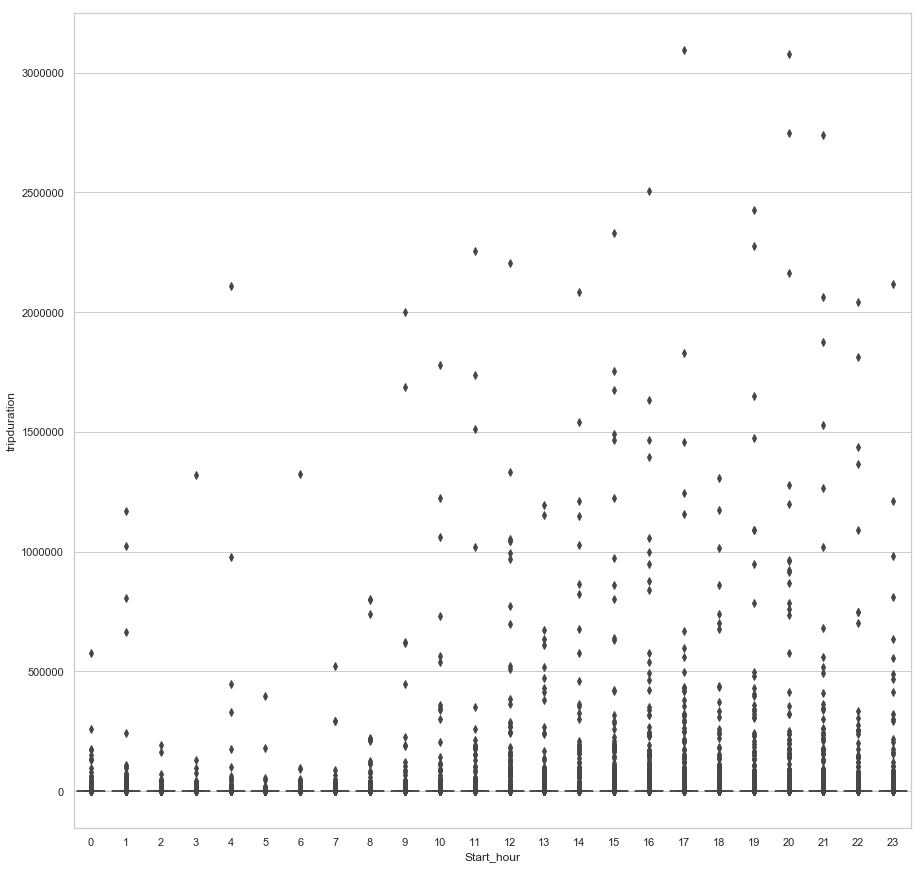

In [15]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize = (15,15))
ax = sns.boxplot(x="Start_hour", y="tripduration", data=citi_data)

Notice, how we have some very high values for trip duration and some very low values for trip duration. 

**--->For our understanding: High values maybe seen, when someone did not dock their bike. Low values, because someone undocked the bike - did not use it and docked it back.**

**---> As part of cleaning, as a team, do we want to get rid of the extremely high values and extremely low values? - Let's discuss**

Monday       245115
Tuesday      269825
Wednesday    346636
Thursday     354158
Friday       326634
Saturday     209770
Sunday       225039
Name: Start_Dayofweek, dtype: int64


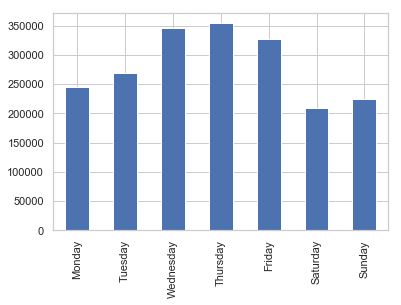

In [16]:
#high_origin_dest = citi_data.groupby(['origin']).size()
#high_origin_dest
#citi_data.dayofweek
#reindex(DAYS, fill_value=0).plot.bar()
#x=citi_data.groupby(citi_data['dayofweek']).count()
#plt.hist(x)
#counting the no of week days:
#crashes_by_day = citi_data['dayofweek']
#crashes_by_day.plot(kind='barh')
#plt.plot(np.sort(crashes_by_day))
#print(crashes_by_day)



#counting the no of week days:
DAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
count_of_rides_weekly=citi_data.Start_Dayofweek.value_counts().reindex(DAYS, fill_value=0)
count_of_rides_weekly.plot(kind='bar')
print(count_of_rides_weekly)



It appears from the above graph, that, The peak usage of Citi bike is Wednesday, Thursday and Friday. Let us also take a look at subscriber/customer usage pattern over the week (counts by day).

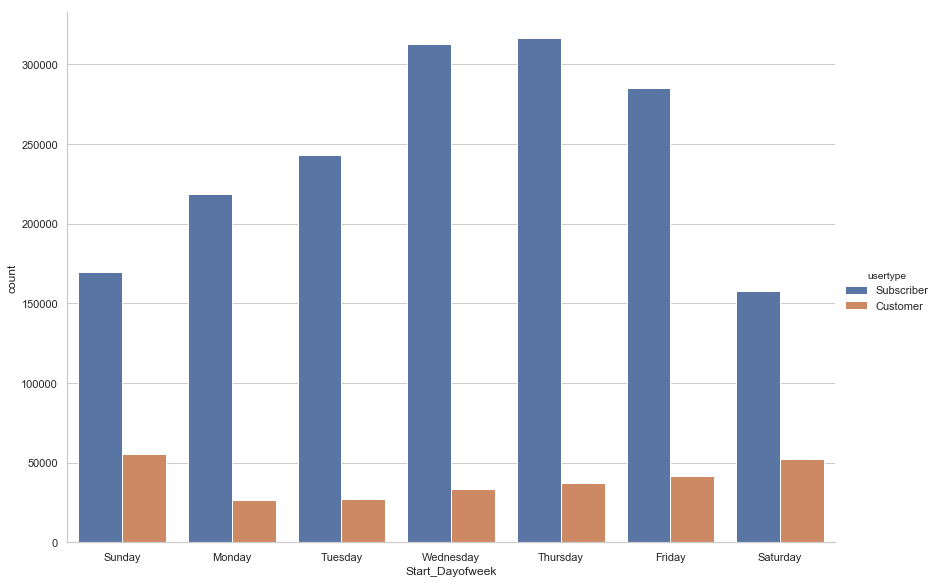

In [27]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
g = sns.catplot("Start_Dayofweek", 
                 hue="usertype",
                 data=citi_data, kind="count",order = order, height=8.27, aspect=11.7/8.27);


As we can see from the above plots, the patterns of usage are different - Customer usage during the weekdays are clearly much lower than their usage in the weekend. 

We do imagine New York has visitors over the weekend and we can henceforth see that pattern here as well. 

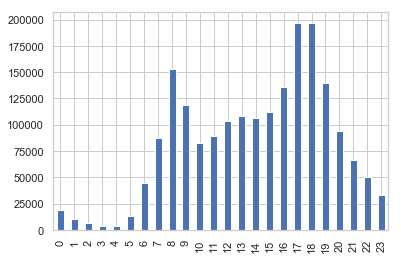

In [28]:
#Counting riders hourly
day=range(0,24)
count_of_rides_hourly = citi_data['Start_hour'].value_counts().reindex(day, fill_value=0)
count_of_rides_hourly.plot(kind='bar')
#print(count_of_rides_hourly)

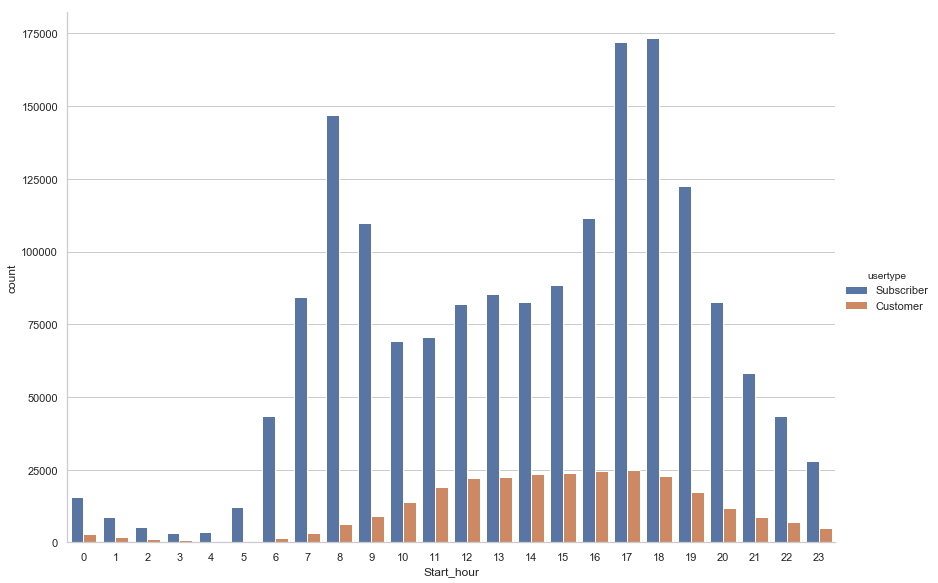

In [30]:
#Counting riders hourly
hour = range(0,24)

g = sns.catplot("Start_hour", 
                 hue="usertype",
                 data=citi_data, kind="count",order = hour, height=8.27, aspect=11.7/8.27);



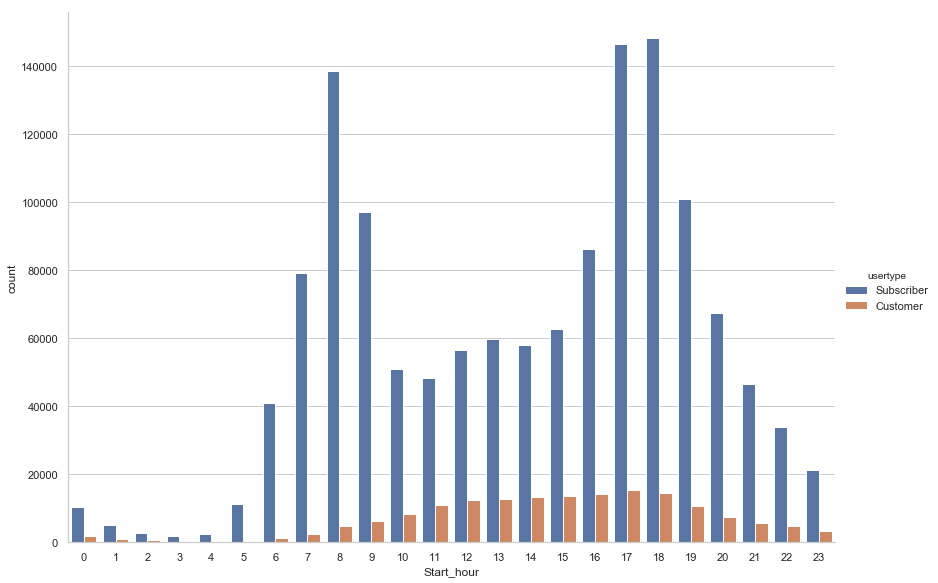

In [32]:
#Counting riders hourly weekday analysis
hour = range(0,24)
weekday = ["Monday","Tuesday","Wednesday","Thursday","Friday"]



g = sns.catplot("Start_hour", 
                 hue="usertype",
                 data=citi_data.loc[citi_data['Start_Dayofweek'].isin(weekday)], kind="count",order = hour, height=8.27, aspect=11.7/8.27);




We can see a pattern of usage for subscribers on weekdays - peaking at about and around 8 am and 5-6 pm. Whereas there seems to be a similar pattern of usage by "Customer" usertype - high usage starting 10-11 am until 6-7 pm on the weekdays.

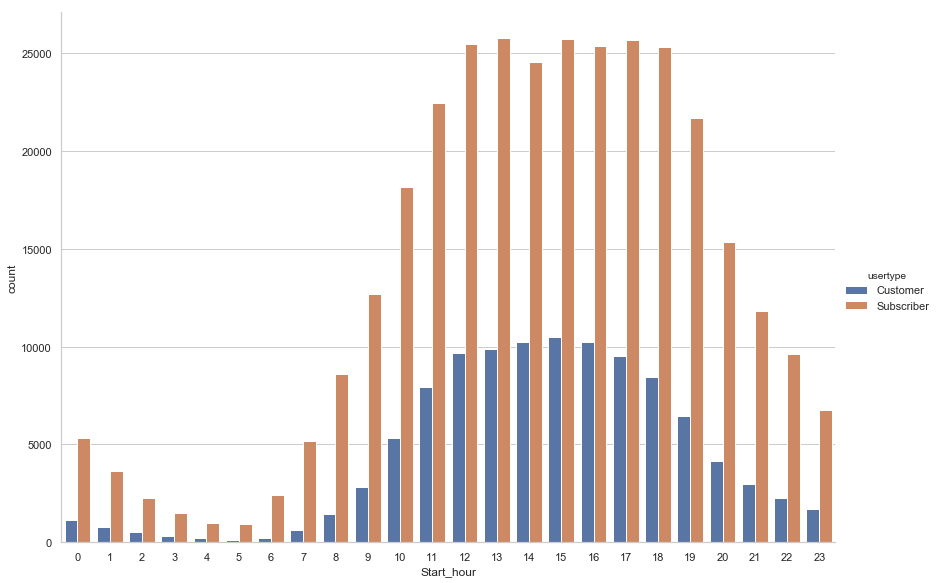

In [34]:
#Counting riders hourly weekday analysis
hour = range(0,24)
weekend = ["Saturday","Sunday"]

g = sns.catplot("Start_hour", 
                 hue="usertype",
                 data=citi_data.loc[citi_data['Start_Dayofweek'].isin(weekend)], 
                kind="count",order = hour, height=8.27, aspect=11.7/8.27);




The patterns for Weekends are clear from the above plot - For both categories, subscriber and customer, there seems to be high demand between 10 am and 7 pm. Some Subscribers also seem to be touring around New York on weekends. 

In [14]:
#ts = citi_data['start_time']
#plt.plot(ts)

Let's try to see the most frequent origin destination pairs.

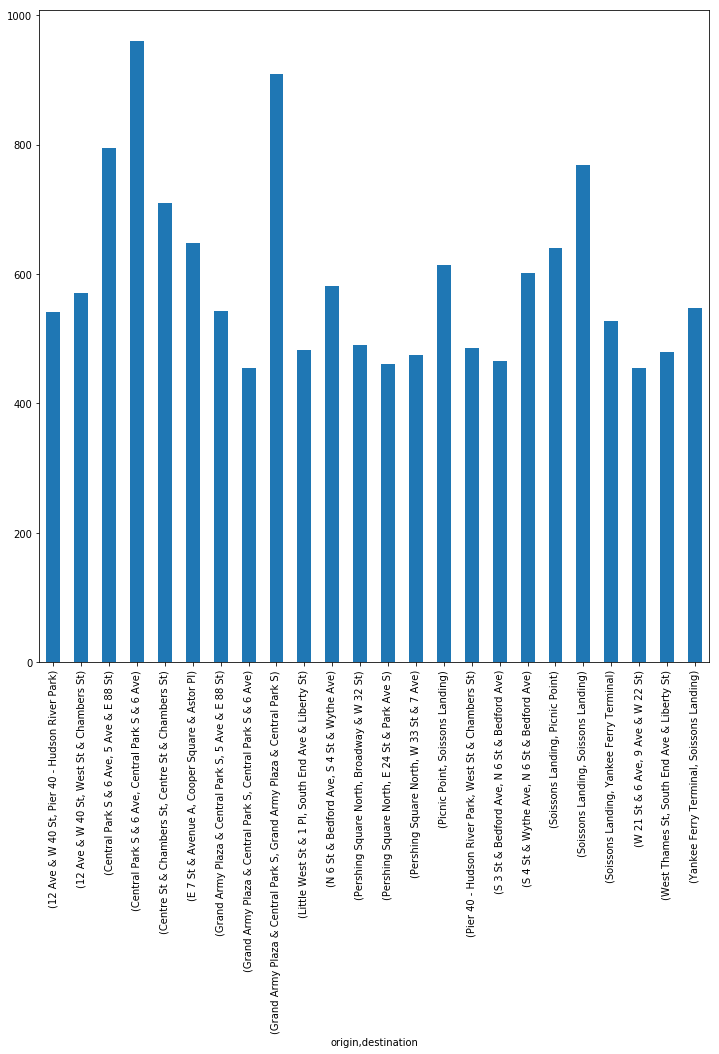

In [17]:
high_origin_dest = citi_data.groupby(['origin','destination']).size()
#print(high_origin_dest)
top_origin_dest = high_origin_dest[high_origin_dest>450]
#print(top_origin_dest)

plt.figure(figsize=(12,12))
top_origin_dest.plot(kind='bar', )

In [18]:
types_users = citi_data['usertype'].value_counts()

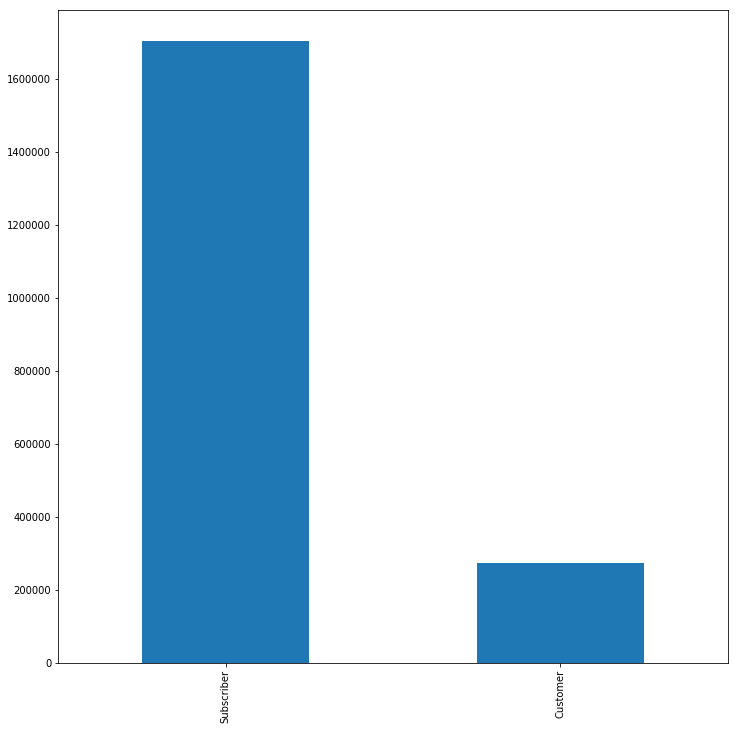

In [19]:
plt.figure(figsize=(12,12))
types_users.plot(kind='bar')

In [13]:
#to find unique gender
citi_data.gender.unique()

array([1, 0, 2])

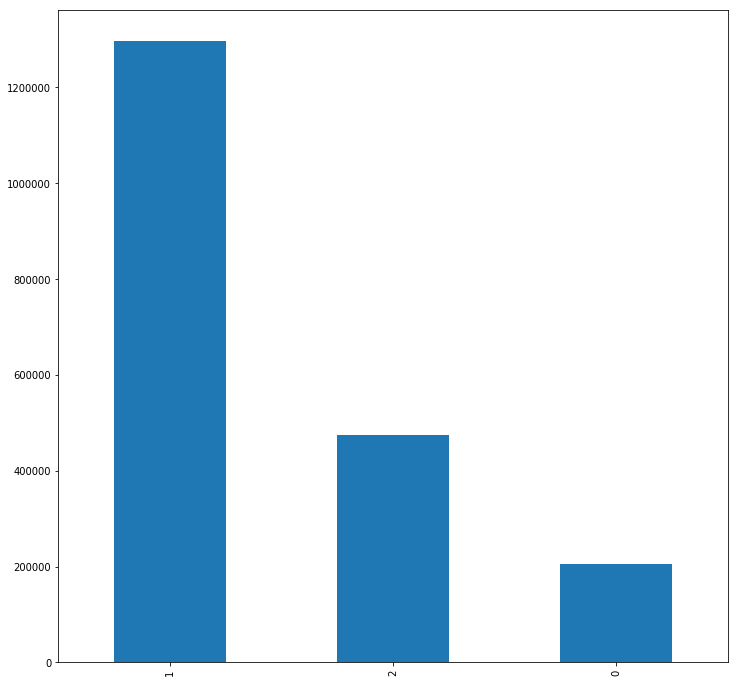

In [38]:
gender_users = citi_data['gender'].value_counts()
plt.figure(figsize=(12,12))
gender_users.plot(kind='bar')

We should now be interested in bringing dates and times into the picture as well!

  What is the question?
 * If Citi bike as a company were to expand in order to manage high traffic areas - what locations would they consider adding more docks or resources?
 * Can they have dockless stations between high demand stations at peak travel times and high traffic locations?
 * How can they improve services for their customers on weekday v/s weekend based on traffic and usage?
 * Regress to a predicted value of number of bikes needed in high demand areas? 
 
Why should anyone care?
* Primarily, helps **Citi Bike** as a company to get perspective as to how they can improve their services and generate more revenue.
* These insights can also help regular **Citi Bike users**.

Team Members:

1. Nikita Reddy
2. Akash Gangrade
3. Rajesh Narasimha Reddy
4. Sneha Mani